# K nearest neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x, y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h: X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1. Read the problem statement.

2. Get the dataset.

3. Explore the dataset.

4. Pre-processing of dataset.

5. Visualization

6. Transform the dataset for building machine learning model.

7. Split data into train, test set.

8. Build Model.

9. Apply the model.

10. Evaluate the model.

11. Finding Optimal K value

12. Repeat 7, 8, 9 steps.

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Download the dataset here:**
- https://www.kaggle.com/uciml/iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Load data

### Question 1

Import the data set and print 10 random rows from the data set

Hint: use **sample()** function to get random rows

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from pandas import DataFrame

In [2]:
# Load Dataset
iris = pd.read_csv("iris.csv")
# Display random 10 records
iris.sample(n=10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
82,83,5.8,2.7,3.9,1.2,Iris-versicolor
100,101,6.3,3.3,6.0,2.5,Iris-virginica
139,140,6.9,3.1,5.4,2.1,Iris-virginica
69,70,5.6,2.5,3.9,1.1,Iris-versicolor
42,43,4.4,3.2,1.3,0.2,Iris-setosa
27,28,5.2,3.5,1.5,0.2,Iris-setosa
77,78,6.7,3.0,5.0,1.7,Iris-versicolor
95,96,5.7,3.0,4.2,1.2,Iris-versicolor
65,66,6.7,3.1,4.4,1.4,Iris-versicolor
85,86,6.0,3.4,4.5,1.6,Iris-versicolor


## Data Pre-processing

### Question 2 - Estimating missing values

Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median)

Calculate the number of missing values per column
- don't use loops

In [3]:
# Count Missing Values
iris.isnull().sum()

Id               0
SepalLengthCm    1
SepalWidthCm     2
PetalLengthCm    2
PetalWidthCm     1
Species          0
dtype: int64

Fill missing values with median of that particular column

In [4]:
iris.fillna(iris.mean(), inplace = True)

In [5]:
iris.tail(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
147,148,6.500000,3.000,5.200000,2.000000,Iris-virginica
148,149,6.200000,3.400,5.400000,2.300000,Iris-virginica
149,150,5.900000,3.000,5.100000,1.800000,Iris-virginica
150,151,5.900000,3.054,3.758667,1.202649,Iris-virginica
151,152,5.843709,3.054,3.758667,1.800000,Iris-virginica


### Question 3 - Dealing with categorical data

Change all the classes to numericals (0 to 2)

Hint: use **LabelEncoder()**

In [6]:
# Even though column Species is not Ordinal, using LabelEncoder because that is what is expected in this question.
le = preprocessing.LabelEncoder()
# Fit the encoder to the pandas column
le.fit(iris['Species'])
# View the labels 
list(le.classes_)

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [7]:
# Apply the fitted encoder to the pandas column
temp_species = le.transform(iris['Species'])
temp_species

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
iris['Species'] = temp_species
iris.sample(n=5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
121,122,5.6,2.8,4.9,2.0,2
27,28,5.2,3.5,1.5,0.2,0
101,102,5.8,2.7,5.1,1.9,2
104,105,6.5,3.0,5.8,2.2,2
79,80,5.7,2.6,3.5,1.0,1


### Question 4

Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.

Hint: use **corr()**

In [9]:
# Dropping id column before calculation of correlation
iris.drop('Id', axis=1, inplace=True)

In [10]:
# Calculate correlation of each feature with target variable
corr_values = iris.drop("Species", axis=1).apply(lambda x: x.corr(iris.Species))
corr_values

SepalLengthCm    0.775490
SepalWidthCm    -0.415367
PetalLengthCm    0.939813
PetalWidthCm     0.951545
dtype: float64

In [11]:
# Identify the features which have correlation in the range of -0.1 to 0.1
corr_values_flags = (corr_values > -0.1) & (corr_values < 0.1)
corr_values_flags

SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
dtype: bool

In [12]:
# Identify the features which should be dropped
corr_values_to_drop = corr_values_flags[corr_values_flags == True]
corr_values_to_drop

Series([], dtype: bool)

In [13]:
# Drop the features which have correlation in the range of -0.1 to 0.1
iris.drop(corr_values_to_drop.index,axis=1)
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Question 5

Observe the independent variables variance and drop such variables having no variance or almost zero variance (variance < 0.1). They will be having almost no influence on the classification

Hint: use **var()**

In [14]:
# Calculate Variance
variance_data = iris.var()
variance_data

SepalLengthCm    0.676633
SepalWidthCm     0.185514
PetalLengthCm    3.071945
PetalWidthCm     0.577079
Species          0.675322
dtype: float64

In [15]:
# Find out features having variance less than 0.1
variance_data_to_drop = variance_data[variance_data < 0.1]
variance_data_to_drop

Series([], dtype: float64)

In [16]:
# Drop features to be dropped according to the condition satisfied
iris.drop(variance_data_to_drop.index,axis=1)
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Question 6

Plot the scatter matrix for all the variables.

Hint: use **pandas.plotting.scatter_matrix()**

you can also use pairplot()

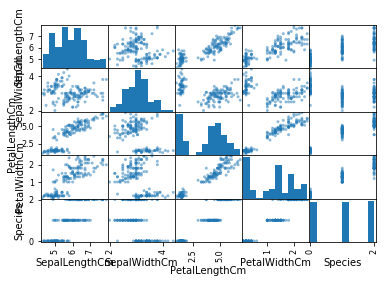

In [17]:
pd.plotting.scatter_matrix(iris)
plt.show()

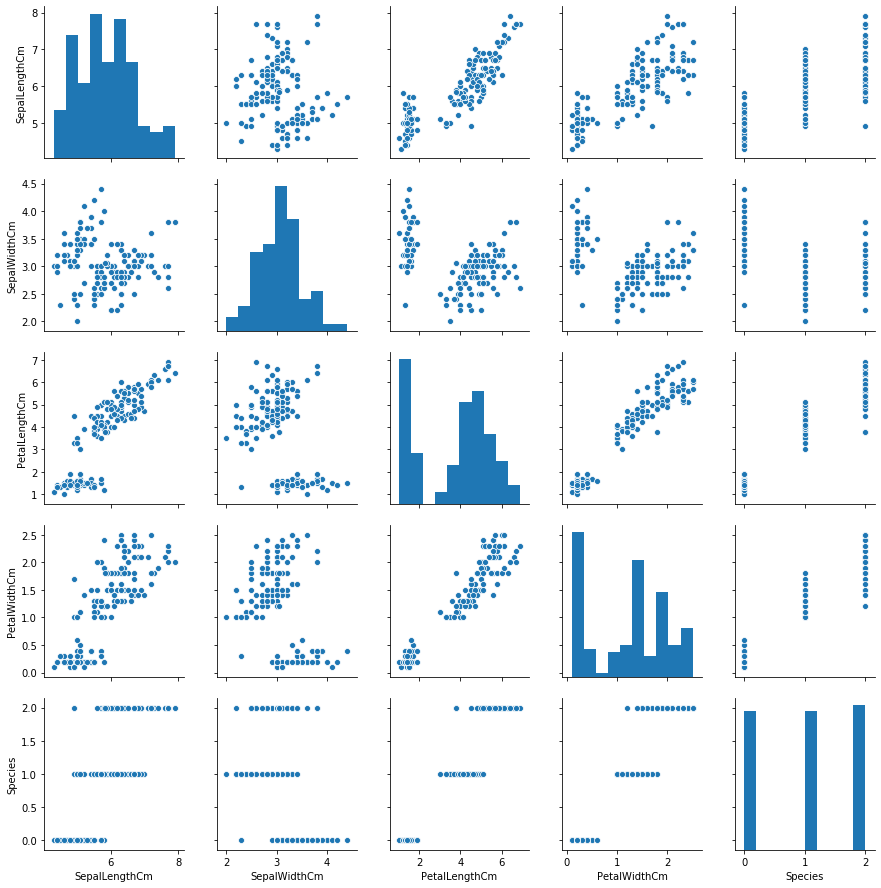

In [18]:
sns.pairplot(iris)
plt.show()

## Split the dataset into training and test sets


### Question 7

Split the dataset into training and test sets with 80-20 ratio

Hint: use **train_test_split()**

In [19]:
iris.head()
y=iris['Species']
X = iris.drop('Species',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=7) # check option of stratify

## Build Model

### Question 8

Build the model and train and test on training and test sets respectively using **scikit-learn**.

Print the Accuracy of the model with different values of **k = 3, 5, 9**

Hint: For accuracy you can check **accuracy_score()** in scikit-learn

In [20]:
arr_k = [3,5,9]
sc=StandardScaler()

for i in arr_k :
    knn=KNeighborsClassifier(n_neighbors=i)
    # Convert all values into the range of 0 to 1.
    sc.fit(X_train)
    scaledX_train = sc.transform(X_train)
    scaledX_test = sc.transform(X_test)
    knn.fit(scaledX_train,y_train)
    y_predict = knn.predict(scaledX_test)
    print("Testing Accuracy when K=",i)
    print(accuracy_score(y_test,y_predict))



Testing Accuracy when K= 3
0.967741935483871
Testing Accuracy when K= 5
0.9354838709677419
Testing Accuracy when K= 9
0.9354838709677419


## Find optimal value of K

### Question 9 - Finding Optimal value of k

- Run the KNN with no of neighbours to be 1, 3, 5 ... 19
- Find the **optimal number of neighbours** from the above list

In [21]:
neighbors = np.arange(1,20,2)
train_accuracy_plot = np.empty(len(neighbors))
test_accuracy_plot = np.empty(len(neighbors))
# Loop over different values of k
for i, k in enumerate(neighbors):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=7)
    sc=StandardScaler()
    scaledX_train = sc.fit_transform(X_train)
    scaledX_test = sc.transform(X_test)
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(scaledX_train,y_train)
    train_accuracy_plot[i] = knn.score(scaledX_train,y_train)
    test_accuracy_plot[i] = knn.score(scaledX_test,y_test) 

train_test_k_accuracy_df = DataFrame({'K':neighbors,
                'Train_Accuracy':train_accuracy_plot,
                'Test_Accuracy':test_accuracy_plot})
print("Accuracy : ")
print(train_test_k_accuracy_df)



Accuracy : 
    K  Train_Accuracy  Test_Accuracy
0   1        1.000000       0.935484
1   3        0.942149       0.967742
2   5        0.942149       0.935484
3   7        0.950413       0.935484
4   9        0.950413       0.935484
5  11        0.950413       0.967742
6  13        0.950413       0.935484
7  15        0.933884       0.935484
8  17        0.942149       0.935484
9  19        0.933884       0.967742


## Plot accuracy

### Question 10

Plot accuracy score vs k (with k value on X-axis) using matplotlib.

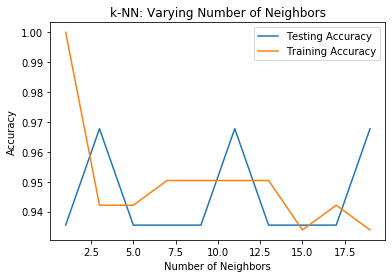

In [22]:

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy_plot, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy_plot, label = 'Training Accuracy')

plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

# Breast cancer dataset

## Read data

### Question 1
Read the data given in bc2.csv file

In [23]:
cancer_df = pd.read_csv("bc2.csv")

## Data preprocessing

### Question 2
Observe the no.of records in dataset and type of each column

In [24]:
len(cancer_df)

699

In [25]:
cancer_df.dtypes

ID                              int64
ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object

### Question 3
Use summary statistics to check if missing values, outlier and encoding treament is necessary

Hint: use **describe()**

In [26]:
cancer_df.drop("ID", axis=1, inplace=True)
cancer_df.describe()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


#### Check Missing Values

In [27]:
cancer_df.isnull().sum()

ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

### Question 4
#### Check how many `?` are there in Bare Nuclei feature (they are also unknown or missing values). 

In [28]:
len(cancer_df[cancer_df["Bare Nuclei"] == '?'])

16

#### Replace them with the 'top' value of the describe function of Bare Nuclei feature

Hint: give value of parameter include='all' in describe function

In [29]:
cancer_df.loc[cancer_df["Bare Nuclei"] == "?", "Bare Nuclei"] = cancer_df["Bare Nuclei"].describe(include='all')['top']

### Question 5
#### Find the distribution of target variable (Class) 

In [30]:
cancer_df.groupby(by='Class').count()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
Class,,,,,,,,,
2,458,458,458,458,458,458,458,458,458
4,241,241,241,241,241,241,241,241,241


#### Plot the distribution of target variable using histogram

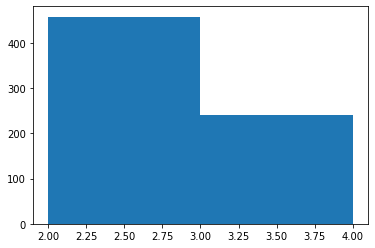

In [31]:
plt.hist(cancer_df['Class'], bins=2)
plt.show()

#### Convert the datatype of Bare Nuclei to `int`

In [32]:
# Get existing datatype
cancer_df['Bare Nuclei'].dtype

dtype('O')

In [33]:
cancer_df["Bare Nuclei"] = cancer_df["Bare Nuclei"].astype(int)

In [34]:
# Get updated datatype
cancer_df['Bare Nuclei'].dtype

dtype('int32')

## Scatter plot

### Question 6
Plot Scatter Matrix to understand the distribution of variables and check if any variables are collinear and drop one of them.

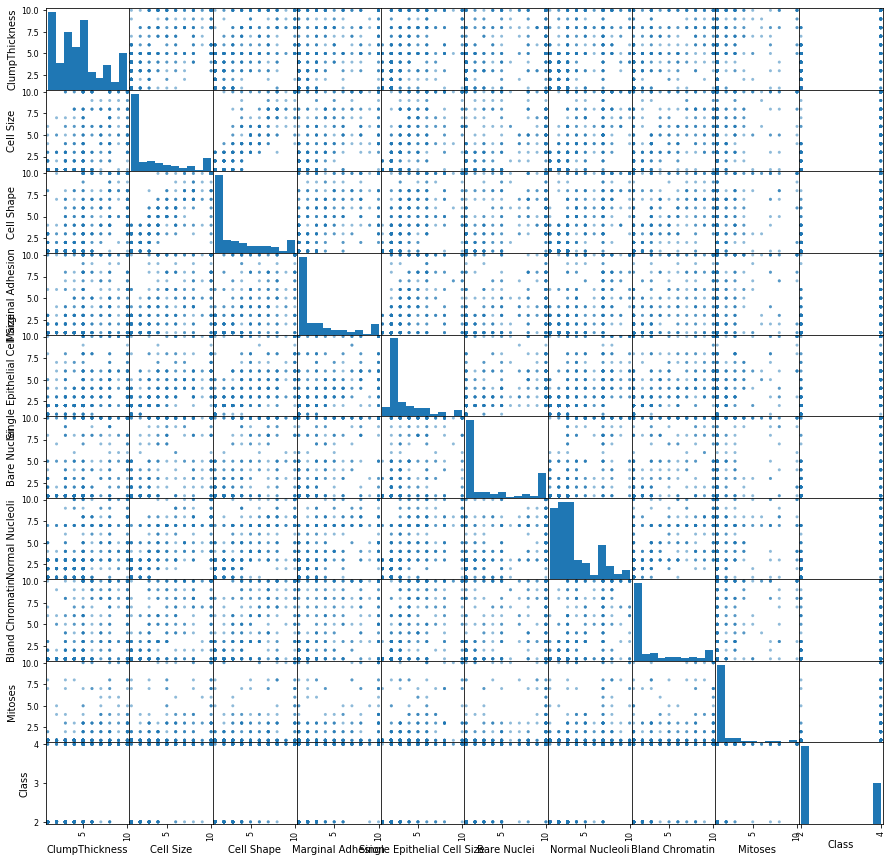

In [35]:
pd.plotting.scatter_matrix(cancer_df, figsize=(15, 15))
plt.show()

## Train test split

### Question 7
#### Divide the dataset into feature set and target set

In [36]:
Y = cancer_df['Class']
X = cancer_df.drop('Class',axis=1)
print(Y.shape)
print(X.shape)

(699,)
(699, 9)


#### Divide the Training and Test sets in 70:30 

In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=37)
print(len(X_train))
print(len(X_test))
print(len(Y_train))
print(len(Y_test))

# Tried many random states. However, they are giving exactly same accuracy 
# Unable to use stratify in argument as shapes of X and Y are different. 

489
210
489
210


## Scale the data

### Question 8
Standardize the data

Hint: use **StandardScaler()**

In [41]:
sc=StandardScaler()
# Convert all values into the range of 0 to 1.
sc.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

## Build Model

### Question 9

Build the model and train and test on training and test sets respectively using **scikit-learn**.

Print the Accuracy of the model with different values of **k = 3, 5, 9**

Hint: For accuracy you can check **accuracy_score()** in scikit-learn

In [42]:
arr_k = [3,5,9]

for i in arr_k :
    knn=KNeighborsClassifier(n_neighbors=i)    
    scaledX_train = sc.transform(X_train)
    scaledX_test = sc.transform(X_test)
    knn.fit(scaledX_train,Y_train)
    Y_predict = knn.predict(scaledX_test)
    print("Testing Accuracy when K=",i)
    print(accuracy_score(Y_test,Y_predict))

Testing Accuracy when K= 3
0.9809523809523809
Testing Accuracy when K= 5
0.9809523809523809
Testing Accuracy when K= 9
0.9809523809523809


## Find optimal value of K

### Question 10
Finding Optimal value of k

- Run the KNN with no of neighbours to be 1, 3, 5 ... 19
- Find the **optimal number of neighbours** from the above list

In [0]:
# As I am getting exactly same accuracy for all K, I have not attempted Question 10 and 11. 
# As I feel I need to first randomize the data correctly and have different accuracy scores.

## Plot accuracy

### Question 11

Plot accuracy score vs k (with k value on X-axis) using matplotlib.

In [0]:
# As I am getting exactly same accuracy for all K, I have not attempted Question 10 and 11. 
# As I feel I need to first randomize the data correctly and have different accuracy scores.